In [40]:
import torch
from matplotlib import pyplot as plt
import numpy as np

In [41]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-1-9 Python-3.10.12 torch-2.1.2 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [26]:
img = 'https://github.com/ultralytics/yolov5/blob/master/data/images/zidane.jpg?raw=true'

In [42]:
img = 'https://images.pexels.com/photos/8327848/pexels-photo-8327848.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1'

In [43]:
results = model(img)
results.print()

image 1/1: 750x1125 1 person, 1 dog
Speed: 174.3ms pre-process, 173.4ms inference, 4.0ms NMS per image at shape (1, 3, 448, 640)


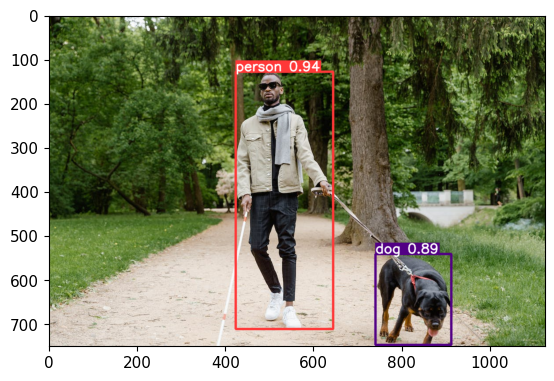

In [44]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [17]:
import uuid   # Unique identifier
import os
import time
import cv2

IMAGES_PATH = os.path.join('yolov5', 'data', 'images')
labels = ['kevin', 'dora']
number_imgs = 5

In [2]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

2024-01-05 18:20:49.194 Python[77779:9290998] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


In [34]:
!cd yolov5 && python train.py --imgsz 320 --batch 2 --epochs 20 --data dataset.yml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=2, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5
requirements: /app/yolov5/requirements.txt not found, check failed.
YOLOv5 🚀 2024-1-4 Python-3.10.12 torch-2.1.2 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momen

# Load Custom model

In [35]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp12/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-1-9 Python-3.10.12 torch-2.1.2 CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [37]:
width = 640
height = 640
down_points = (width, height)

img = os.path.join('yolov5', 'data', 'images', 'kevin.10eb686a-ac21-11ee-96f9-9224db8f207c.jpg')
# resized_down = cv2.resize(image, down_points, interpolation= cv2.INTER_LINEAR)
results = model(img)
print(results.print)

%matplotlib inline 
# plt.imshow(np.squeeze(results.render()))
plt.show()

<bound method Detections.print of YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 1080x1920 (no detections)
Speed: 17.4ms pre-process, 178.4ms inference, 0.5ms NMS per image at shape (1, 3, 384, 640)>


In [2]:
import cv2

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    # results = model(frame)
    
    cv2.imshow('img', frame)
    
    # cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

2024-01-05 18:09:00.251 Python[77328:9283035] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


In [4]:
cap.release()
cv2.destroyAllWindows()

# scale down image

In [39]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
 
# Read the image using imread function
img_path = os.path.join('yolov5', 'data', 'images', 'kevin.10eb686a-ac21-11ee-96f9-9224db8f207c.jpg')
image = cv2.imread(img_path)
# cv2.imshow('Original Image', image)
 
# let's downscale the image using new  width and height
width = 640
height = 640
down_points = (width, height)
resized_down = cv2.resize(image, down_points, interpolation= cv2.INTER_LINEAR)
# x, y = (700, 350)
# crop_img = image[y:y+height, x:x+width]
# cv2.imshow("cropped", crop_img)
# plt.imshow(np.squeeze(resized_down))
plt.show()
# cv2.imwrite("resized.jpg", resized_down)